# 该方法使用离散小波分解获取对应的统计参数

In [1]:
import sys
sys.path.append('../')
from wavelet_detials.lib.make_spatialVx import make_spatialVx
from wavelet_detials.lib.datagrabber_spatialVx import datagrabber_spatialVx
from wavelet_detials.waverify2d_spatial_vx import waverify2d_spatial_vx
from wavelet_detials.wavepurifyVx_default import wavepurifyVx_default
import pyreadr
import matplotlib.pyplot as plt

## waverify2d 相关方法共两个， 由输入参数的不同决定具体使用的方法


<font face="黑体" color=Blue size=3>**waverify2d_default(grd_ob, grd_fo, clim=None, wavelet_type="haar", j=None, use_ll=False, compute_shannon=False,
                       which_space="field", verbose=False)**</font>
                             
<font face="黑体" color=Blue size=3>**waverify2d_spatial_vx(input_object, clim=None, wavelet_type="haar", j=None, use_ll=False, compute_shannon=False,
                          which_space="field", time_point=1, obs=1, model=1, verbose=False)**</font>   
  
|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=Blue size=5>grd_ob</font>**| 二维矩阵形式的网格观测场 | 
|**<font face="黑体" color=Blue size=5>grd_fo</font>**| 二维矩阵形式的网格预报场 |  
|**<font face="黑体" color=Blue size=5>input_object</font>**| make_spatialVx的结果, 使用该方法相当于从make_spatialVx的结果中，根据time_point，obs， model 获取对应的观测场预报场，并调用waverify2d_default | 
|*clim*| 二值矩阵形式的气象场（climatology field）|
|*wavelet_type*| 字符串，代表小波分析中使用的类型， 默认为haar， 可使用\['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor'\]， 详细说明见pywt包|
|*j*| int类型， 代表小波层数，，如果缺省则根据场是否为二值的（dyadic）计算， 如果为二值（输入场的两个维度方向的log2值均为整数）则为log2(min(dim(X)))， 否则设为4， 详细说明见pywt包|
|*use_ll*| 布尔值，逆小波变换中是否使用ll|
|*compute_shannon*| 布尔值，是否计算香农熵|
|*which_space*| 可选参数“field”， “wavelet”，  如果为 “field”, 则使用原始场(i.e., the detail reconstruction), 若为"wavelet"，则在小波空间中计算(i.e., the detail wavelet coefficients)|
|*verbose*| 布尔值，是否打印日志 | 
|**time_point**| 整数，代表分析的时间序号 |  
|**obs**| 整数，代表分析的观测场序号 |  
|**model**| 整数，代表分析的预报场序号 |  


**调用示例**

In [2]:
# 此处使用waverify2d_spatial_vx， 使用make_spatialVx处理输入参数
obs = pyreadr.read_r('./data/UKobs6.Rdata')['UKobs6']
fcst = pyreadr.read_r('./data/UKfcst6.Rdata')['UKfcst6']
loc = pyreadr.read_r('./data/UKloc.Rdata')['UKloc']
hold = make_spatialVx(obs, fcst, loc, fieldtype="Rainfall", units="mm/h", dataname="Nimrod",
                          obsname="UKobs6", modelname="UKfcst6", thresholds=[0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50])

<font face="黑体" color=green size=4>**返回结果内容说明**</font>  
  
|一级关键词|说明|备注|
|:---|:--:|:---|
|**<font face="黑体" color=green size=3>grd_ob_wave</font>**| dict类型，key为LH, HL, HH, LL 加层数，仅最后一层含有LL |观测场离散小波分解后的结果|
|**<font face="黑体" color=green size=3>grd_fo_wave</font>**| dict类型，key为LH, HL, HH, LL 加层数，仅最后一层含有LL |预报场离散小波分解后的结果|
|**<font face="黑体" color=green size=3>shannon_entropy</font>**| 香农熵，1 x 2的二维数组，第一列为观测场的熵，第二列为预报场的熵 | 仅compute_shannon = True 时计算|
|**<font face="黑体" color=green size=3>energy</font>**| 包含两列的二维数组， 每行代表对应的level，第一列为观测场的能量，第二列为预报场的能量 ||
|**<font face="黑体" color=green size=3>mse</font>**| 一维数组，对应level的均方误差 ||
|**<font face="黑体" color=green size=3>rmse</font>**| 一维数组，对应level的均方根误差  ||
|**<font face="黑体" color=green size=3>acc</font>**| 一维数组，对应level的异常相关系数(anomaly correlation coefficient)  |仅clim 非空 时计算|

In [3]:
res1 = waverify2d_spatial_vx(hold, compute_shannon=True)

### 部分结果示例

In [4]:
print(res1["energy"])

[[ 3400.780325    9791.455125  ]
 [ 5846.45300625  8418.12296875]
 [ 7191.12737031  9039.76532969]
 [ 8234.83108633  9996.87487617]
 [10430.10124736  9527.32252275]
 [ 7592.40412625  6757.65985803]
 [14272.5567628   5083.92773836]
 [ 1106.37584566    98.49916346]]


In [5]:
print(res1["mse"])

[0.12718622 0.12935115 0.13976874 0.15316486 0.12826448 0.05283681
 0.02797083 0.00461263]


In [6]:
print(res1["rmse"])

[0.35663177 0.35965421 0.37385657 0.39136283 0.35814031 0.22986258
 0.16724483 0.06791632]


### 部分结果图示

<function matplotlib.pyplot.show(close=None, block=None)>

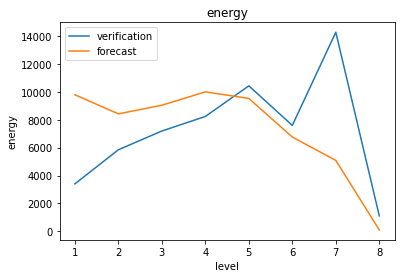

In [7]:
x = range(1, res1["energy"][:, 0].size + 1)
plt.plot(x, res1["energy"][:, 0], label="verification")
plt.plot(x, res1["energy"][:, 1], label="forecast")
plt.xlabel("level")
plt.ylabel("energy")
plt.title("energy")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

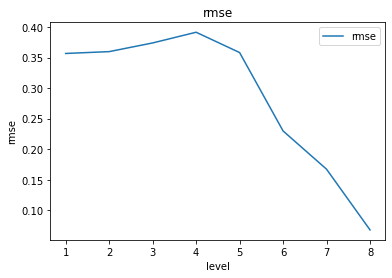

In [8]:
x = range(1, res1["rmse"].size + 1)
plt.plot(x, res1["rmse"], label="rmse")
plt.xlabel("level")
plt.ylabel("rmse")
plt.title("rmse")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

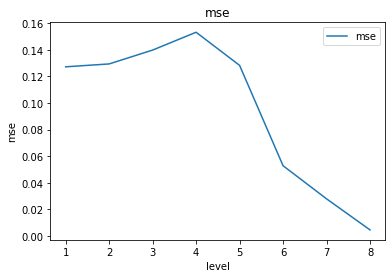

In [9]:
x = range(1, res1["mse"].size + 1)
plt.plot(x, res1["mse"], label="mse")
plt.xlabel("level")
plt.ylabel("mse")
plt.title("mse")
plt.legend()
plt.show

### 相关文献

Briggs, W. M. and Levine, R. A. (1997) Wavelets and field forecast verification. Mon. Wea. Rev., 125, 1329–1341.

Casati, B., Ross, G. and Stephenson, D. B. (2004) A new intensity-scale approach for the verification of spatial precipitation forecasts. Meteorol. Appl. 11, 141–154.

Casati, B. (2010) New Developments of the Intensity-Scale Technique within the Spatial Verification Methods Inter-Comparison Project. Wea. Forecasting 25, (1), 113–143, doi:10.1175/2009WAF2222257.1.

Lindsay, R. W., Percival, D. B. and Rothrock, D. A. (1996) The discrete wavelet transform and the scale analysis of the surface properties of sea ice. IEEE Transactions on Geoscience and Remote Sensing, 34 (3), 771–787.

Percival, D. B. and Guttorp, P. (1994) Long-memory processes, the Allan variance and wavelets. In Wavelets in Geophysics, Foufoula-Georgiou, E. and Kumar, P., Eds., New York: Academic, pp. 325–343.